# Pivot points - Analytics

In [74]:
##Relation ship
#data['rate_x'] = data.apply(lambda r: 100 * (r['Close'] - r['Open']) / r['P'], axis=1)
#data['rate_y'] = data.apply(lambda r: (r['Close'] - r['BBL']) / (r['BBU'] - r['BBL']), axis=1)

### Import Library

In [36]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

### Load Price Data

In [37]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [38]:
data_tmp = dataset.copy()

In [39]:
def prepareData(htd):
    _1_d_df = htd.copy()
    _1_d_df = _1_d_df.resample("D").agg({
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min'
    })
    _1_d_df.dropna(inplace=True)
    _1_d_df = cal_pivots(_1_d_df)
    _1_d_df = _1_d_df[['P', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Close']].rename(columns={'Close': 'Day_Close'})
    _1_d_df.dropna(inplace=True)

    htd = htd.assign(time_d=pd.PeriodIndex(htd.index, freq='1D').to_timestamp())
    htd = pd.merge(htd, _1_d_df, left_on="time_d", right_index=True, how="left")
    htd.dropna(inplace=True)
    return htd


def cal_first_open(tick):
    tick = tick[100 * tick.index.hour + tick.index.minute == 900]
    return tick


def cal_first_close(tick):
    tick = tick[100 * tick.index.hour + tick.index.minute == 900]
    return tick


def cal_second_open(tick):
    tick = tick[100 * tick.index.hour + tick.index.minute == 905]
    return tick


def cal_second_close(tick):
    tick = tick[100 * tick.index.hour + tick.index.minute == 905]
    return tick


def cal_pivot(row):
    pivot = (row['High_s'] + row['Low_s'] + row['Close_s']) / 3
    return pivot


def cal_r1(row):
    result = 2 * row['P'] - row['Low_s']
    return result


def cal_r2(row):
    result = row['P'] + row['High_s'] - row['Low_s']
    return result


def cal_r3(row):
    # result = row['P'] + 2 * (row['High_s'] - row['Low_s'])    # Classic
    result = row['P'] * 2 + row['High_s'] - 2 * row['Low_s']
    return result


def cal_r4(row):
    # result = row['P'] + 3 * (row['High_s'] - row['Low_s'])    # Classic
    result = row['P'] * 3 + row['High_s'] - 3 * row['Low_s']
    return result


def cal_r5(row):
    # result = row['P'] + 4 * (row['High_s'] - row['Low_s'])      # Classic
    result = row['P'] * 4 + row['High_s'] - 4 * row['Low_s']
    return result


def cal_r6(row):
    # result = row['P'] + 5 * (row['High_s'] - row['Low_s'])      # Classic
    result = row['P'] * 5 + row['High_s'] - 5 * row['Low_s']
    return result


def cal_s1(row):
    result = 2 * row['P'] - row['High_s']
    return result


def cal_s2(row):
    result = row['P'] - (row['High_s'] - row['Low_s'])
    return result


def cal_s3(row):
    # result = row['P'] - 2 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 2 - (2 * row['High_s'] - row['Low_s'])
    return result


def cal_s4(row):
    # result = row['P'] - 3 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 3 - (3 * row['High_s'] - row['Low_s'])
    return result


def cal_s5(row):
    # result = row['P'] - 4 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 4 - (4 * row['High_s'] - row['Low_s'])
    return result


def cal_s6(row):
    # result = row['P'] - 5 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 5 - (5 * row['High_s'] - row['Low_s'])
    return result


def cal_pivots(_1_d_df):
    _1_d_df['High_s'] = _1_d_df['High'].shift(1)
    _1_d_df['Low_s'] = _1_d_df['Low'].shift(1)
    _1_d_df['Close_s'] = _1_d_df['Close'].shift(1)
    _1_d_df['P'] = _1_d_df.apply(
        lambda row: cal_pivot(row), axis=1)
    _1_d_df['R1'] = _1_d_df.apply(
        lambda row: cal_r1(row), axis=1)
    _1_d_df['R2'] = _1_d_df.apply(
        lambda row: cal_r2(row), axis=1)
    _1_d_df['R3'] = _1_d_df.apply(
        lambda row: cal_r3(row), axis=1)
    _1_d_df['R4'] = _1_d_df.apply(
        lambda row: cal_r4(row), axis=1)
    _1_d_df['R5'] = _1_d_df.apply(
        lambda row: cal_r5(row), axis=1)
    _1_d_df['R6'] = _1_d_df.apply(
        lambda row: cal_r6(row), axis=1)
    _1_d_df['S1'] = _1_d_df.apply(
        lambda row: cal_s1(row), axis=1)
    _1_d_df['S2'] = _1_d_df.apply(
        lambda row: cal_s2(row), axis=1)
    _1_d_df['S3'] = _1_d_df.apply(
        lambda row: cal_s3(row), axis=1)
    _1_d_df['S4'] = _1_d_df.apply(
        lambda row: cal_s4(row), axis=1)
    _1_d_df['S5'] = _1_d_df.apply(
        lambda row: cal_s5(row), axis=1)
    _1_d_df['S6'] = _1_d_df.apply(
        lambda row: cal_s6(row), axis=1)
    return _1_d_df

In [40]:
data = prepareData(data_tmp)
data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,R4,R5,R6,S1,S2,S3,S4,S5,S6,Day_Close
Date,,,,,,,,,,,,,,,,,,,,
2018-08-14 09:00:00,955.5,955.5,954.7,954.9,1103,2018-08-14,950.366667,958.433333,962.666667,970.733333,978.8,986.866667,994.933333,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3
2018-08-14 09:05:00,954.8,955.0,954.3,955.0,530,2018-08-14,950.366667,958.433333,962.666667,970.733333,978.8,986.866667,994.933333,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3
2018-08-14 09:10:00,955.0,955.1,954.7,955.0,509,2018-08-14,950.366667,958.433333,962.666667,970.733333,978.8,986.866667,994.933333,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3
2018-08-14 09:15:00,955.0,957.0,955.0,956.9,1758,2018-08-14,950.366667,958.433333,962.666667,970.733333,978.8,986.866667,994.933333,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3
2018-08-14 09:20:00,956.5,956.6,955.6,955.8,1230,2018-08-14,950.366667,958.433333,962.666667,970.733333,978.8,986.866667,994.933333,946.133333,938.066667,933.833333,929.6,925.366667,921.133333,959.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 14:15:00,1301.2,1301.6,1298.3,1299.5,9058,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,1331.7,1340.600000,1349.500000,1288.600000,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1
2024-07-19 14:20:00,1299.1,1301.8,1295.3,1301.6,12762,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,1331.7,1340.600000,1349.500000,1288.600000,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1
2024-07-19 14:25:00,1302.4,1302.6,1300.1,1302.2,8096,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,1331.7,1340.600000,1349.500000,1288.600000,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1


In [41]:
bbands = ta.bbands(data.Close, length=30, std=2)
data=data.join(bbands)

In [42]:
data.rename(columns={'BBL_30_2.0': 'BBL', 'BBU_30_2.0': 'BBU'}, inplace=True)
data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,S3,S4,S5,S6,Day_Close,BBL,BBM_30_2.0,BBU,BBB_30_2.0,BBP_30_2.0
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-14 09:00:00,955.5,955.5,954.7,954.9,1103,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,933.833333,929.6,925.366667,921.133333,959.3,NaN,NaN,NaN,NaN,NaN
2018-08-14 09:05:00,954.8,955.0,954.3,955.0,530,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,933.833333,929.6,925.366667,921.133333,959.3,NaN,NaN,NaN,NaN,NaN
2018-08-14 09:10:00,955.0,955.1,954.7,955.0,509,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,933.833333,929.6,925.366667,921.133333,959.3,NaN,NaN,NaN,NaN,NaN
2018-08-14 09:15:00,955.0,957.0,955.0,956.9,1758,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,933.833333,929.6,925.366667,921.133333,959.3,NaN,NaN,NaN,NaN,NaN
2018-08-14 09:20:00,956.5,956.6,955.6,955.8,1230,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,933.833333,929.6,925.366667,921.133333,959.3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 14:15:00,1301.2,1301.6,1298.3,1299.5,9058,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1271.500000,1263.3,1255.100000,1246.900000,1297.1,1298.652159,1302.716667,1306.781174,0.624005,0.104298
2024-07-19 14:20:00,1299.1,1301.8,1295.3,1301.6,12762,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1271.500000,1263.3,1255.100000,1246.900000,1297.1,1298.659973,1302.576667,1306.493360,0.601376,0.375320
2024-07-19 14:25:00,1302.4,1302.6,1300.1,1302.2,8096,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1271.500000,1263.3,1255.100000,1246.900000,1297.1,1298.860233,1302.416667,1305.973101,0.546128,0.469539


In [43]:
data['rate_x'] = data.apply(lambda r: 100 * (r['Close'] - r['Open']) / r['P'], axis=1)
data['rate_y'] = data.apply(lambda r: (r['Close'] - r['BBL']) / (r['BBU'] - r['BBL']), axis=1)

In [44]:
data.dropna(inplace=True)
data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,S5,S6,Day_Close,BBL,BBM_30_2.0,BBU,BBB_30_2.0,BBP_30_2.0,rate_x,rate_y
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-14 11:25:00,954.1,955.0,953.9,954.5,1493,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,925.366667,921.133333,959.3,952.411205,955.033333,957.655461,0.549118,0.398301,0.042089,0.398301
2018-08-14 11:30:00,954.3,954.3,954.3,954.3,16,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,925.366667,921.133333,959.3,952.378321,955.013333,957.648345,0.551827,0.364643,0.000000,0.364643
2018-08-14 13:00:00,954.5,954.5,953.2,953.4,870,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,925.366667,921.133333,959.3,952.262050,954.960000,957.657950,0.565039,0.210892,-0.115745,0.210892
2018-08-14 13:05:00,953.5,953.8,952.5,953.8,1128,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,925.366667,921.133333,959.3,952.190214,954.920000,957.649786,0.571731,0.294856,0.031567,0.294856
2018-08-14 13:10:00,953.6,955.5,953.2,955.0,2144,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,925.366667,921.133333,959.3,952.227252,954.856667,957.486081,0.550745,0.527256,0.147312,0.527256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 14:15:00,1301.2,1301.6,1298.3,1299.5,9058,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1255.100000,1246.900000,1297.1,1298.652159,1302.716667,1306.781174,0.624005,0.104298,-0.131092,0.104298
2024-07-19 14:20:00,1299.1,1301.8,1295.3,1301.6,12762,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1255.100000,1246.900000,1297.1,1298.659973,1302.576667,1306.493360,0.601376,0.375320,0.192782,0.375320
2024-07-19 14:25:00,1302.4,1302.6,1300.1,1302.2,8096,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1255.100000,1246.900000,1297.1,1298.860233,1302.416667,1305.973101,0.546128,0.469539,-0.015423,0.469539


### Calcualting return

In [45]:
def cal_cross(row):
    cross = ''
    if row['Low'] < row['S4'] < row['High'] or row['Low'] < row['S3'] < row['High'] or \
                row['Low'] < row['S2'] < row['High'] or row['Low'] < row['S1'] < row['High']:
        cross = 'cross_s'
    elif row['Low'] < row['R1'] < row['High']\
                or row['Low'] < row['R2'] < row['High'] or row['Low'] < row['R3'] < row['High']\
                or row['Low'] < row['R4'] < row['High']:
        cross = 'cross_r'
    elif row['Low'] < row['P'] < row['High']:
        cross = 'cross_p'
    return cross
data['cross'] = data.apply(lambda r: cal_cross(r), axis=1)

In [46]:
working_data = data[data['cross'] != '']

In [47]:
from cal_return_pivots import cal_return
working_data = cal_return(working_data)

In [61]:
working_data = working_data[100*working_data.index.hour + working_data.index.minute < 1420]

In [62]:
working_data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,BBU,BBB_30_2.0,BBP_30_2.0,rate_x,rate_y,cross,return,exit_time,rate_x_group,rate_y_group
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-14 13:40:00,957.3,958.6,957.3,958.3,2787,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,958.078293,0.641167,1.036207,0.105223,1.036207,cross_r,0,,"(0.0917, 0.118]","(0.973, 1.051]"
2018-08-14 13:55:00,957.4,959.7,956.8,959.5,2926,2018-08-14,950.366667,958.433333,962.666667,970.733333,...,958.827254,0.750368,1.093856,0.220967,1.093856,cross_r,0,,"(0.209, 0.312]","(1.051, 1.162]"
2018-08-15 10:50:00,959.6,959.6,957.5,958.0,3980,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,962.060521,0.361792,-0.168705,-0.167061,-0.168705,cross_p,-6.5,2018-08-15 14:15:00,"(-0.219, -0.159]","(-0.191, -0.0711]"
2018-08-15 10:55:00,958.0,958.7,957.6,958.1,2078,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,962.099291,0.391429,-0.064043,0.010441,-0.064043,cross_p,-6.6,2018-08-15 14:15:00,"(0.0, 0.0115]","(-0.0711, 0.0149]"
2018-08-15 11:10:00,957.6,958.3,957.5,957.7,1515,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,962.134959,0.455920,-0.013338,0.010441,-0.013338,cross_p,-6.2,2018-08-15 14:15:00,"(0.0, 0.0115]","(-0.0711, 0.0149]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18 14:10:00,1293.1,1293.1,1290.5,1291.6,5161,2024-07-18,1306.566667,1318.433333,1333.666667,1345.533333,...,1303.390742,1.006129,0.096367,-0.114805,0.096367,cross_s,2.4,2024-07-18 14:15:00,"(-0.121, -0.0914]","(0.0869, 0.142]"
2024-07-18 14:15:00,1291.4,1294.5,1290.8,1294.0,9232,2024-07-18,1306.566667,1318.433333,1333.666667,1345.533333,...,1302.928201,0.975606,0.294199,0.198995,0.294199,cross_s,0,,"(0.153, 0.209]","(0.284, 0.33]"
2024-07-19 09:25:00,1303.2,1309.1,1303.2,1309.0,8842,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1305.628622,1.323307,1.196422,0.447255,1.196422,cross_r,-7.4,2024-07-19 14:20:00,"(0.312, 5.332]","(1.162, 1.721]"


In [63]:
working_data['rate_x'].describe()

count    14679.000000
mean        -0.002617
std          0.214854
min         -4.216661
25%         -0.078945
50%          0.000000
75%          0.079181
max          5.332006
Name: rate_x, dtype: float64

In [64]:
working_data['rate_y'].describe()

count    14679.000000
mean         0.496997
std          0.393545
min         -0.780612
25%          0.208240
50%          0.497571
75%          0.795469
max          1.721017
Name: rate_y, dtype: float64

In [65]:
working_data['rate_x_group'] = pd.qcut(working_data.rate_x, 22)
working_data['rate_y_group'] = pd.qcut(working_data.rate_y, 25)

In [67]:
lsg = working_data.groupby(['rate_x_group', 'rate_y_group'])[['return']].mean()
lsg = lsg.reset_index()
lsg_pivot = lsg.pivot(index="rate_x_group", columns="rate_y_group", values="return").sort_index(ascending=False)
lsg_pivot = lsg_pivot[lsg_pivot.columns].astype(float)

In [68]:
lsg_pivot

rate_y_group,"(-0.782, -0.184]","(-0.184, -0.063]","(-0.063, 0.0219]","(0.0219, 0.0924]","(0.0924, 0.146]","(0.146, 0.196]","(0.196, 0.241]","(0.241, 0.286]","(0.286, 0.332]","(0.332, 0.378]",...,"(0.624, 0.672]","(0.672, 0.717]","(0.717, 0.76]","(0.76, 0.806]","(0.806, 0.852]","(0.852, 0.903]","(0.903, 0.967]","(0.967, 1.046]","(1.046, 1.155]","(1.155, 1.721]"
rate_x_group,,,,,,,,,,,,,,,,,,,,,
"(0.304, 5.332]",-3.450000,20.387500,7.557143,-1.525000,3.321429,3.507692,-1.553333,-3.290909,-2.881250,0.319231,...,0.820000,-0.064286,-0.965217,0.825000,-5.258333,-0.428571,3.080645,2.302778,-1.824051,0.175000
"(0.204, 0.304]",7.000000,-1.712500,2.470000,0.580000,-5.838095,0.057143,-1.036364,0.140000,-1.080952,-3.005882,...,1.180000,-1.900000,-2.136364,-1.900000,1.395238,0.891667,0.635897,1.292593,-1.042254,-0.705376
"(0.151, 0.204]",-0.766667,-2.475000,-3.564706,1.638889,0.941667,0.482353,-0.941176,0.294737,-1.780000,0.360000,...,-1.234615,-2.986364,1.225000,2.457895,0.253333,-0.524000,-0.576087,1.248980,0.871186,0.056667
"(0.115, 0.151]",2.900000,-5.928571,-2.892857,-1.290909,-3.300000,1.827273,1.623529,-1.376190,-0.761905,-1.642857,...,2.600000,-1.450000,-2.109524,-0.278125,1.439286,0.785000,-0.731707,-1.454167,-0.416901,-0.570370
"(0.0902, 0.115]",4.633333,0.700000,-6.694737,-0.016000,-0.888889,-1.404348,-2.015625,-2.496000,-2.102778,-1.554545,...,0.717647,-2.051852,-0.721875,0.700000,3.472414,-1.575862,1.279412,0.252941,-0.600000,0.027273
"(0.0689, 0.0902]",-2.500000,-0.950000,0.628571,-3.810000,1.053333,-0.116667,1.488235,-2.857143,-1.614286,-1.086111,...,-1.327586,-0.253125,-2.503704,0.825714,-2.157895,1.390000,-3.054545,1.017241,0.323256,-1.092105
"(0.0534, 0.0689]",-1.183333,1.630000,-0.233333,-3.378261,-2.658333,-1.459091,-0.391429,-1.208000,-1.440000,-2.203448,...,-2.047059,-0.864706,0.557576,-0.737037,-2.206667,-2.296774,1.217857,0.725581,-1.553571,0.080769
"(0.0375, 0.0534]",-2.833333,-2.760000,-3.266667,-3.980000,-0.904762,-0.224138,1.058333,0.984848,-1.419355,-3.248387,...,-3.173077,-0.269231,-0.280000,0.896875,0.393333,-0.900000,-0.463636,-0.277500,-0.726667,-2.013333
"(0.0238, 0.0375]",-1.300000,-0.016667,-0.968750,0.788889,1.055000,-1.076471,-1.089655,-1.231579,-3.548387,1.004545,...,0.947368,-0.050000,-1.102778,0.557576,-1.470000,-1.538462,-3.136111,-0.896154,-1.291176,1.036842


<Axes: xlabel='rate_y_group', ylabel='rate_x_group'>

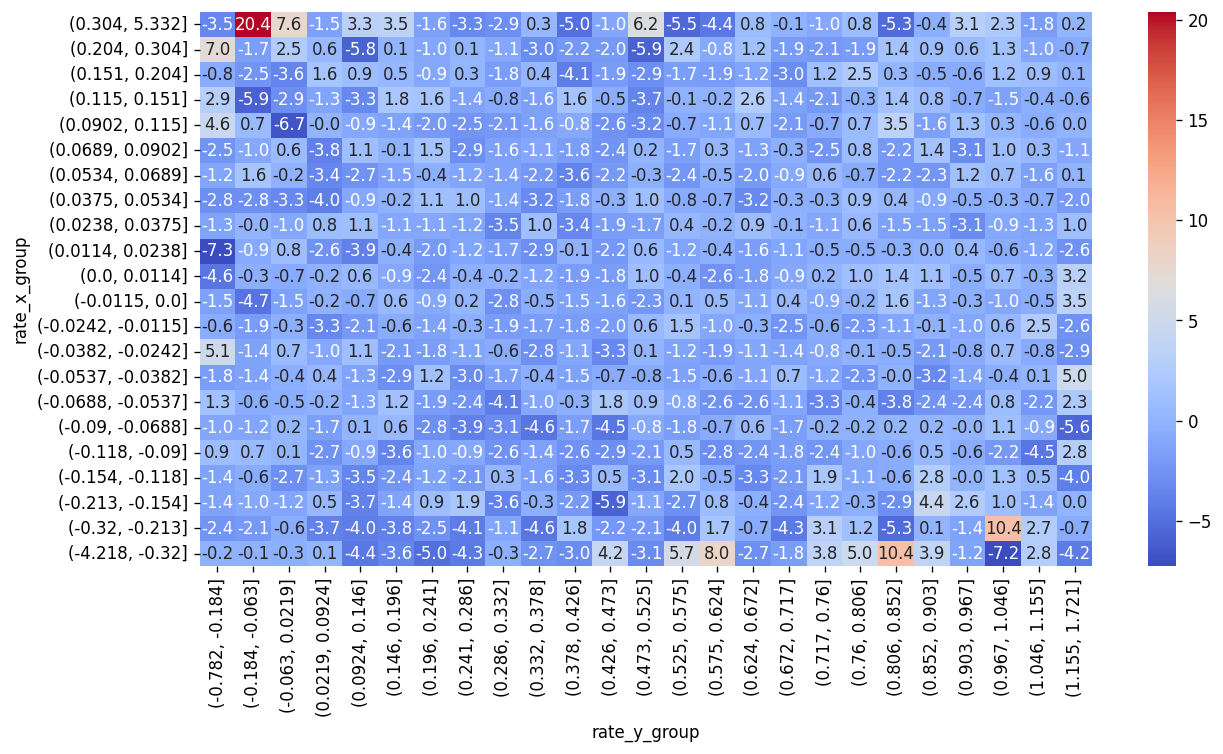

In [69]:
sns.heatmap(lsg_pivot, cmap = 'coolwarm', annot=True, fmt=".1f")

In [70]:
cross_r = working_data[working_data.cross == 'cross_p']
cross_r['rate_y'].describe()

count    5127.000000
mean        0.487367
std         0.313776
min        -0.634884
25%         0.291962
50%         0.488583
75%         0.693254
max         1.479080
Name: rate_y, dtype: float64

In [71]:
cross_r['rate_x'].describe()

count    5127.000000
mean       -0.001606
std         0.192833
min        -2.175459
25%        -0.077056
50%         0.000000
75%         0.075006
max         2.059951
Name: rate_x, dtype: float64

In [72]:
cross_r['rate_x_group'] = pd.qcut(cross_r.rate_x, 20)
cross_r['rate_y_group'] = pd.qcut(cross_r.rate_y, 20)

<Axes: xlabel='rate_y_group', ylabel='rate_x_group'>

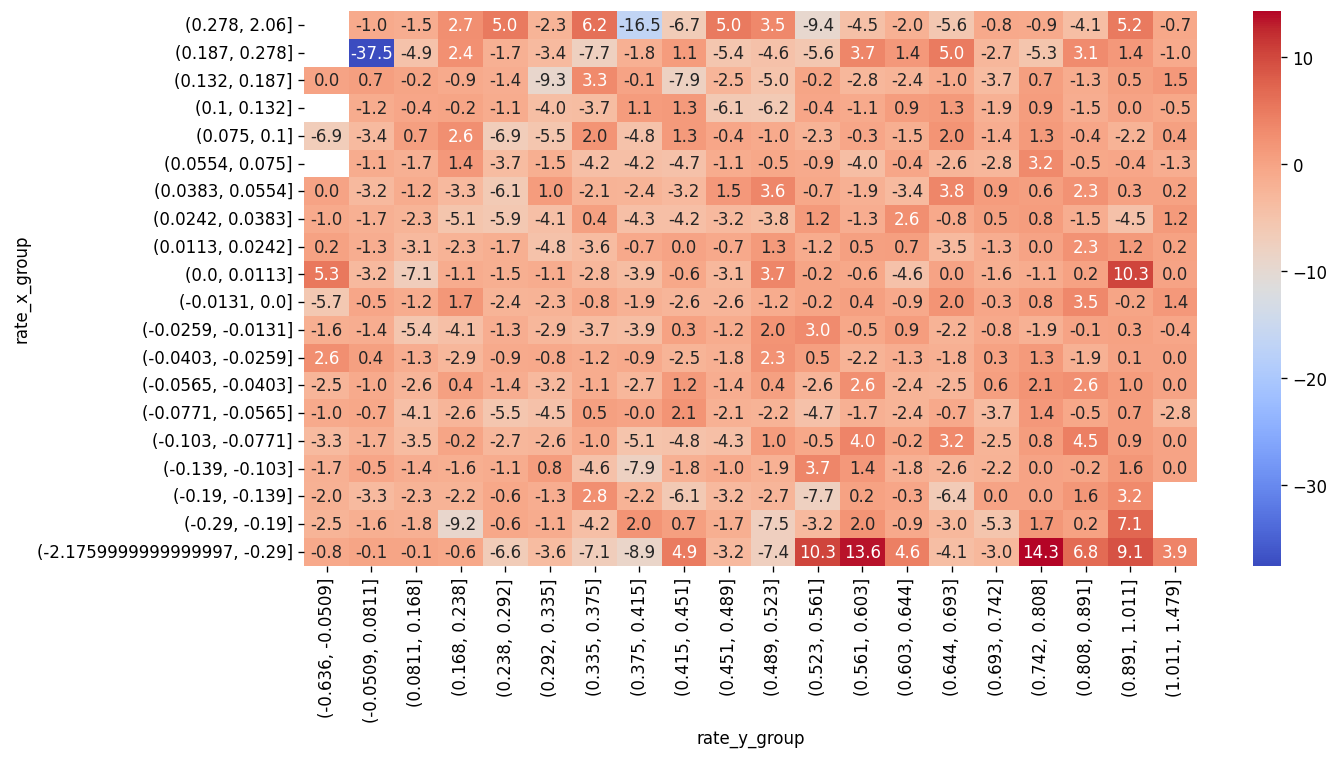

In [73]:
lsg = cross_r.groupby(['rate_x_group', 'rate_y_group'])[['return']].mean()
lsg = lsg.reset_index()
lsg_pivot = lsg.pivot(index="rate_x_group", columns="rate_y_group", values="return").sort_index(ascending=False)
lsg_pivot = lsg_pivot[lsg_pivot.columns].astype(float)
sns.heatmap(lsg_pivot, cmap = 'coolwarm', annot=True, fmt=".1f")